<a href="https://colab.research.google.com/github/dietadestina/PA_EVCast/blob/main/ARIMA_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [923]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dietadestina/PA_EVCast/refs/heads/main/ev_cat.csv')
df['Date'] = pd.to_datetime(df['Date'])
print(df)

          Date   Value
0   2001-01-01      92
1   2002-01-01     298
2   2003-01-01      82
3   2004-01-01      60
4   2005-01-01      64
..         ...     ...
278 2019-12-01   17033
279 2020-12-01   15854
280 2021-12-01   53755
281 2022-12-01  105006
282 2023-12-01  141947

[283 rows x 2 columns]


In [924]:
df = df[df['Date'].dt.year >= 2015]

<Axes: >

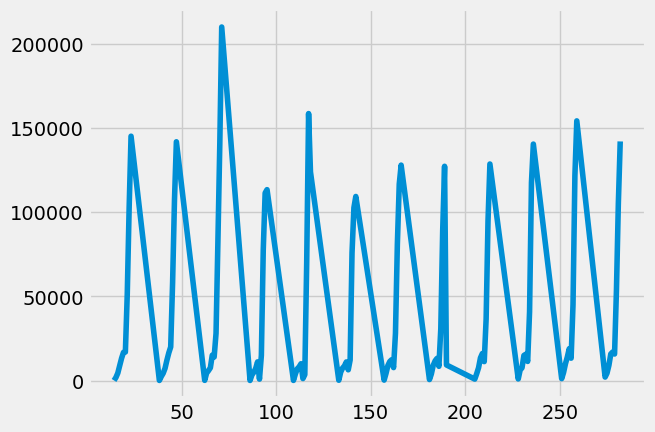

In [925]:
df['Value'].plot()

<Figure size 640x480 with 0 Axes>

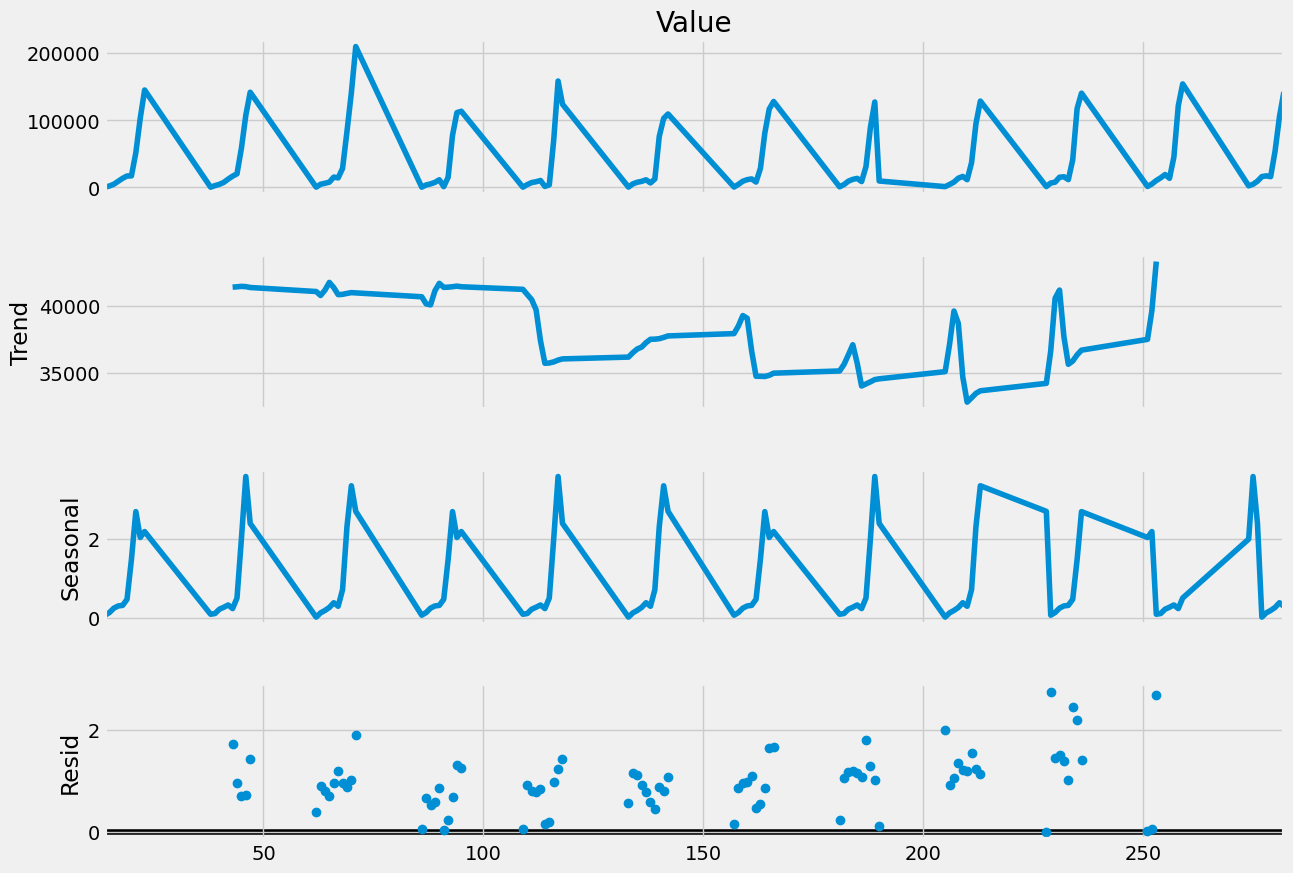

In [926]:
result = seasonal_decompose(df["Value"], model="multiplicative", period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches (15,10)

In [927]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Value'])
test_result

(-2.3337381670324415,
 0.16131745671172165,
 9,
 106,
 {'1%': -3.4936021509366793,
  '5%': -2.8892174239808703,
  '10%': -2.58153320754717},
 2377.2052233101676)

In [928]:
df['Value'] = df['Value'].diff()
df = df.dropna()
test_result=adfuller(df['Value'])
test_result

(-17.062357535467864,
 7.930047610171204e-30,
 8,
 106,
 {'1%': -3.4936021509366793,
  '5%': -2.8892174239808703,
  '10%': -2.58153320754717},
 2358.9379679288795)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

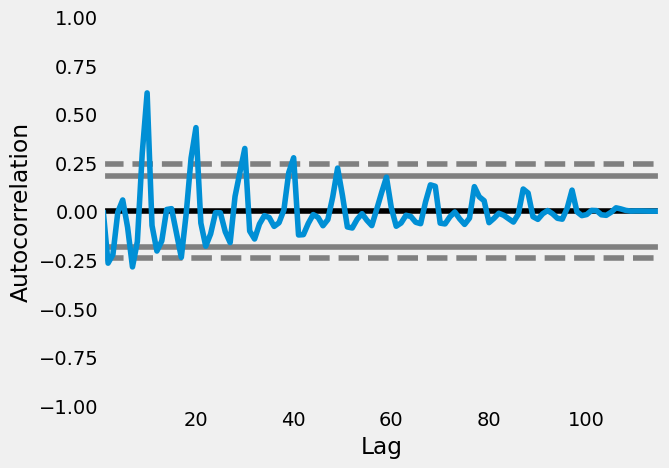

In [929]:
pd.plotting.autocorrelation_plot(df["Value"])

In [930]:
d = 1
p = 2

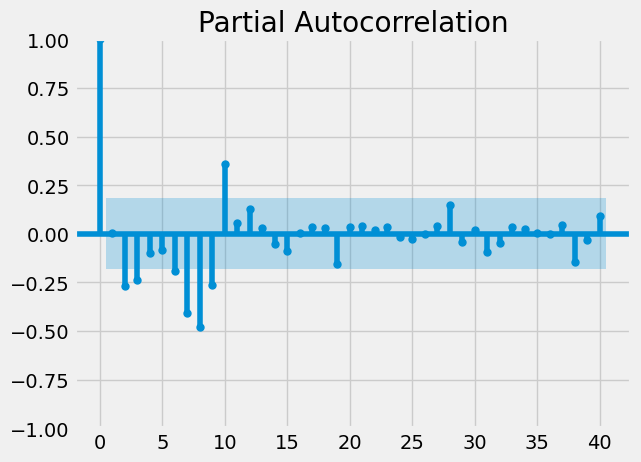

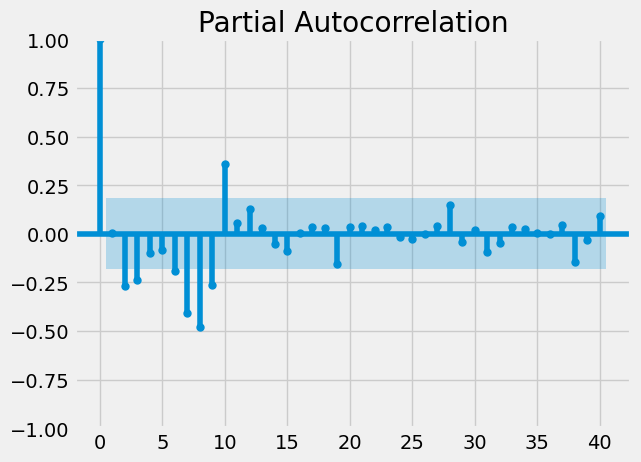

In [931]:
plot_pacf(df["Value"], lags=40)

In [932]:
q = 1

In [933]:
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
model = sm.tsa.statespace.SARIMAX(df["Value"], order=(p,d,q), seasonal_order=(p,d,q,12))
model = model.fit()

print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



                                     SARIMAX Results                                      
Dep. Variable:                              Value   No. Observations:                  115
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -1275.785
Date:                            Fri, 22 Nov 2024   AIC                           2565.570
Time:                                    06:12:34   BIC                           2583.945
Sample:                                         0   HQIC                          2573.010
                                            - 115                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0607      0.455      0.133      0.894      -0.832       0.953
ar.L2         -0.2835      0.436   

In [934]:
start = len(df)
end = len(df) + 36
predictions = model.predict(start=start, end=end)
print(predictions)

115     3418.220814
116    13514.468914
117    -5533.459264
118   -13925.727664
119    15818.534922
120     7577.438963
121   -21801.636438
122    17899.074632
123    11306.303210
124    -3702.651321
125    18874.348638
126      273.999074
127    12090.648264
128    26507.013533
129    -3461.374406
130   -19281.632008
131    21048.298188
132    10516.606410
133   -28264.733527
134    16834.101792
135    11293.286614
136      173.831559
137    20557.036829
138     2770.156112
139    14265.970608
140    30809.872811
141      315.096521
142   -28116.909619
143    20449.532024
144    11021.565391
145   -24132.236404
146    16789.391491
147    11442.059058
148     3989.854336
149    23942.873190
150     6382.377166
151    14428.875215
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



<Axes: >

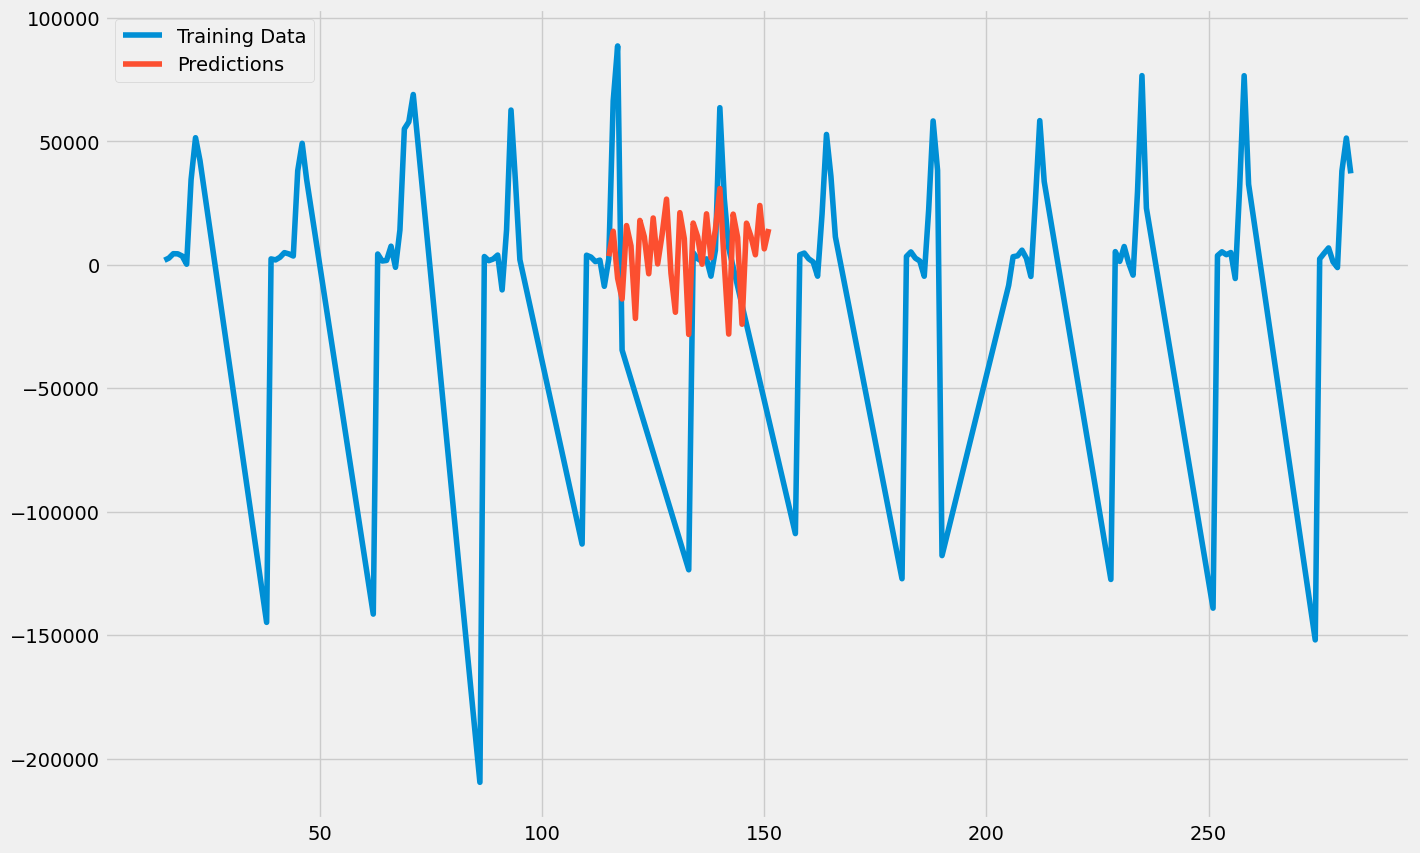

In [935]:
df["Value"].plot(legend=True, label="Training Data", figsize=(15,10))
predictions.plot(legend=True, label="Predictions")

<ipython-input-936-f4433ba94820>:11: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



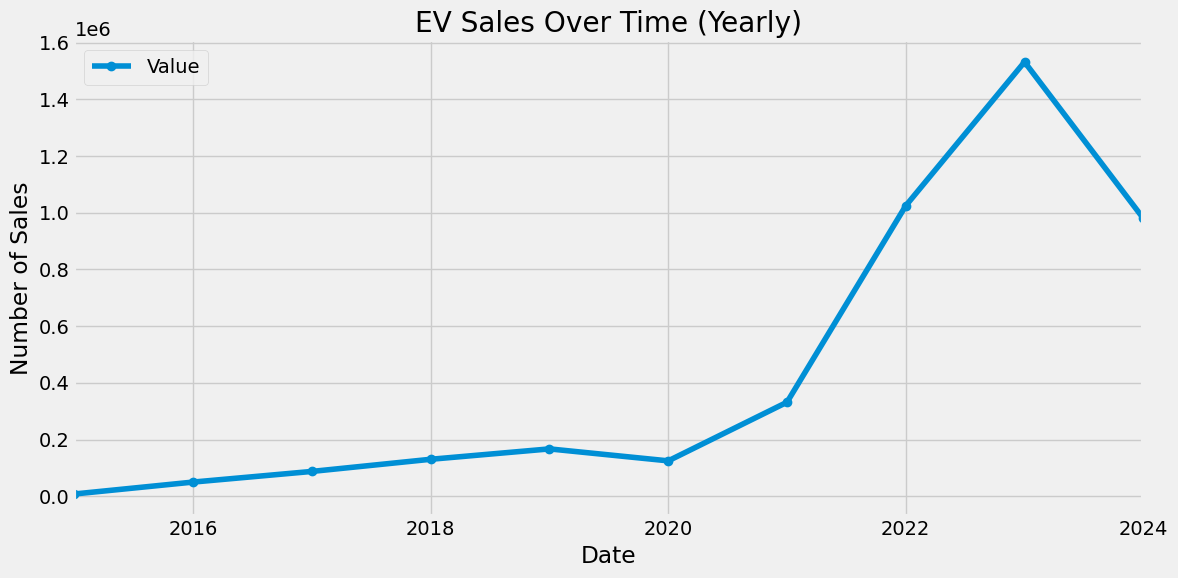

ADF Statistic: 2.520408825396557
p-value: 0.9990561373999097
ADF Statistic (after differencing): 0.2619748673001981
p-value (after differencing): 0.9755310556994916
ADF Statistic (after differencing): -5.47419139791868
p-value (after differencing): 2.3617697907607058e-06
                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                    8
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -99.905
Date:                Fri, 22 Nov 2024   AIC                            203.810
Time:                        06:12:35   BIC                            203.702
Sample:                    12-31-2017   HQIC                           202.473
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------

<ipython-input-936-f4433ba94820>:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-936-f4433ba94820>:49: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



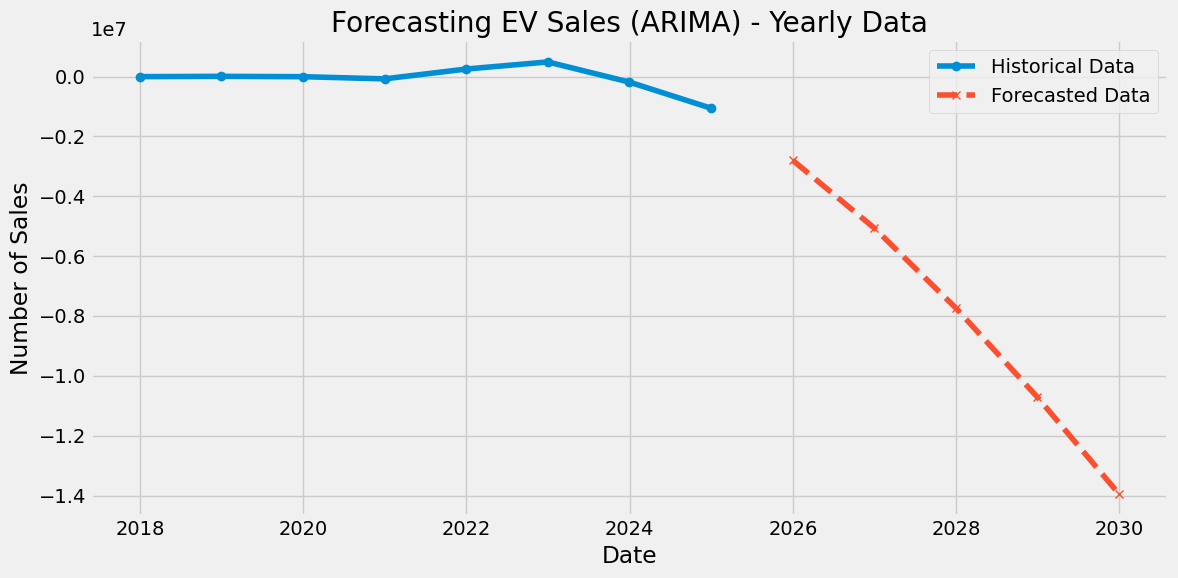

In [936]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv('https://raw.githubusercontent.com/dietadestina/PA_EVCast/refs/heads/main/ev_cat.csv')
df['Date'] = pd.to_datetime(df['Date'])

df = df[df['Date'].dt.year >= 2015]

df_yearly = df.resample('Y', on='Date').sum()

df_yearly.plot(y='Value', figsize=(12, 6), marker='o', linestyle='-', title='EV Sales Over Time (Yearly)')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

test_result = adfuller(df_yearly['Value'])
print(f"ADF Statistic: {test_result[0]}")
print(f"p-value: {test_result[1]}")

df_yearly['Value'] = df_yearly['Value'].diff()
df_yearly = df_yearly.dropna()

test_result = adfuller(df_yearly['Value'])
print(f"ADF Statistic (after differencing): {test_result[0]}")
print(f"p-value (after differencing): {test_result[1]}")

df_yearly['Value'] = df_yearly['Value'].diff()
df_yearly = df_yearly.dropna()

test_result = adfuller(df_yearly['Value'])
print(f"ADF Statistic (after differencing): {test_result[0]}")
print(f"p-value (after differencing): {test_result[1]}")

p, d, q = 1, 1, 0
model = ARIMA(df_yearly['Value'], order=(p, d, q))

model_fit = model.fit()

print(model_fit.summary())

forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

last_date = df_yearly.index[-1]
future_dates = pd.date_range(last_date + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')

last_value = df_yearly['Value'].iloc[-1]
predicted_sales = last_value + forecast.cumsum()

plt.figure(figsize=(12, 6))
plt.plot(df_yearly.index, df_yearly['Value'], label='Historical Data', marker='o')
plt.plot(future_dates, predicted_sales, label='Forecasted Data', linestyle='--', marker='x')
plt.title('Forecasting EV Sales (ARIMA) - Yearly Data')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-937-7fc6fe4e351b>:11: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



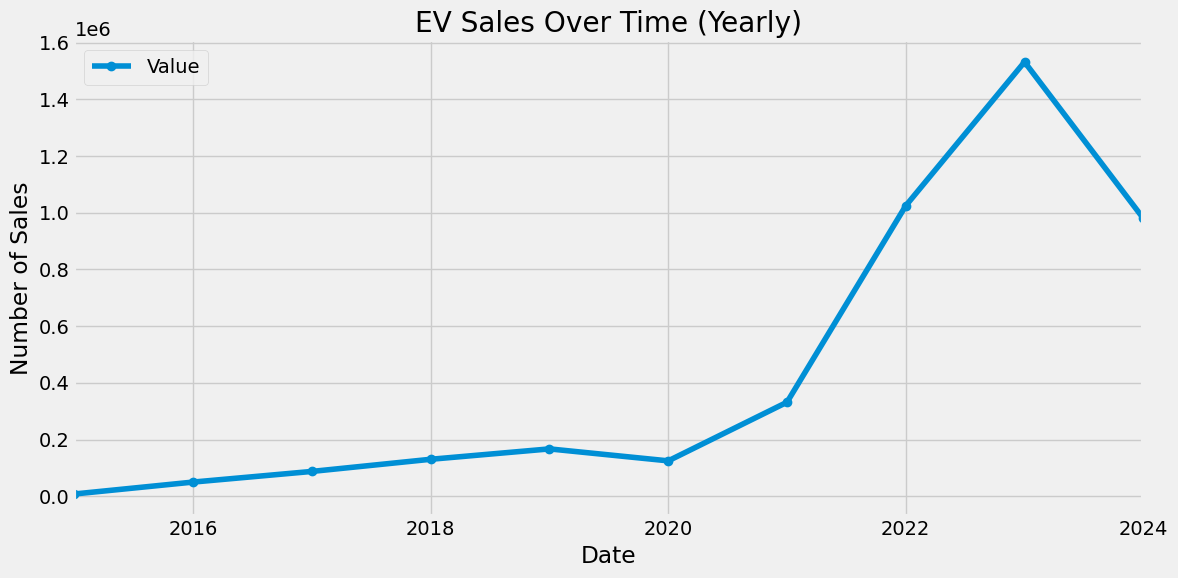

ADF Statistic: 2.520408825396557
p-value: 0.9990561373999097
ADF Statistic (after differencing): 0.2619748673001981
p-value (after differencing): 0.9755310556994916
ADF Statistic (after differencing): -5.47419139791868
p-value (after differencing): 2.3617697907607058e-06
                                      SARIMAX Results                                      
Dep. Variable:                               Value   No. Observations:                    8
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 2)   Log Likelihood                 -72.569
Date:                             Fri, 22 Nov 2024   AIC                            153.137
Time:                                     06:12:36   BIC                            151.575
Sample:                                 12-31-2017   HQIC                           148.944
                                      - 12-31-2024                                         
Covariance Type:                               opg                                  

<ipython-input-937-7fc6fe4e351b>:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

<ipython-input-937-7fc6fe4e351b>:50: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



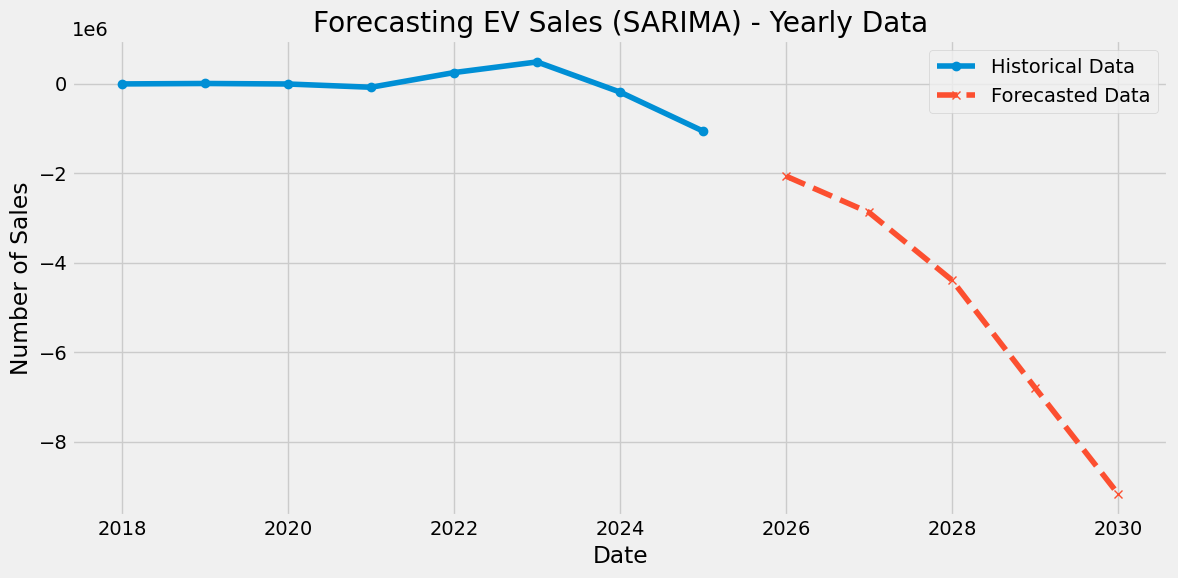

In [937]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

df = pd.read_csv('https://raw.githubusercontent.com/dietadestina/PA_EVCast/refs/heads/main/ev_cat.csv')
df['Date'] = pd.to_datetime(df['Date'])

df = df[df['Date'].dt.year >= 2015]

df_yearly = df.resample('Y', on='Date').sum()

df_yearly.plot(y='Value', figsize=(12, 6), marker='o', linestyle='-', title='EV Sales Over Time (Yearly)')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

test_result = adfuller(df_yearly['Value'])
print(f"ADF Statistic: {test_result[0]}")
print(f"p-value: {test_result[1]}")

df_yearly['Value'] = df_yearly['Value'].diff()
df_yearly = df_yearly.dropna()

test_result = adfuller(df_yearly['Value'])
print(f"ADF Statistic (after differencing): {test_result[0]}")
print(f"p-value (after differencing): {test_result[1]}")

df_yearly['Value'] = df_yearly['Value'].diff()
df_yearly = df_yearly.dropna()

test_result = adfuller(df_yearly['Value'])
print(f"ADF Statistic (after differencing): {test_result[0]}")
print(f"p-value (after differencing): {test_result[1]}")

p, d, q = 1, 1, 0
seasonal_order = (1, 1, 1, 2)  # Musiman dengan periode 12 untuk data tahunan

model = SARIMAX(df_yearly['Value'], order=(p, d, q), seasonal_order=seasonal_order)
model_fit = model.fit()

print(model_fit.summary())

forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

last_date = df_yearly.index[-1]
future_dates = pd.date_range(last_date + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')

last_value = df_yearly['Value'].iloc[-1]
predicted_sales = last_value + forecast.cumsum()

plt.figure(figsize=(12, 6))
plt.plot(df_yearly.index, df_yearly['Value'], label='Historical Data', marker='o')
plt.plot(future_dates, predicted_sales, label='Forecasted Data', linestyle='--', marker='x')
plt.title('Forecasting EV Sales (SARIMA) - Yearly Data')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()